In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_moons, make_circles, make_classification

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Stacking

[sklearn.ensemble.StackingClassifier — scikit-learn 0.23.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

Note that estimators_ are fitted on the full X while final_estimator_ is trained using cross-validated predictions of the base estimators using cross_val_predict.

Parameters
1. estimators: list of (str, estimator):  Base estimators which will be stacked together. Each element of the list is defined as a tuple of string (i.e. name) and an estimator instance.
2. final_estimator estimator, default=None: A classifier which will be used to combine the base estimators. The default classifier is a LogisticRegression.
3. passthrough bool, default=False: When False, only the predictions of estimators will be used as training data for final_estimator. When True, the final_estimator is trained on the predictions as well as the original training data.





In [3]:
X, y = load_breast_cancer(return_X_y=True)

estimators = [
    ('GaussianNB', GaussianNB()),
    ('SVC_lin', SVC(kernel='linear', C=10)),
    ('SVC_rbf',SVC(kernel='rbf'))
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

#for ename, emodel in estimators:
#    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

clf_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear"), passthrough=False)
clf_stacking_passthrough = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear"), passthrough=True)

print()
print('Stacking:', clf_stacking.fit(X_train, y_train).score(X_test, y_test))
print('Stacking with passthrough:', clf_stacking_passthrough.fit(X_train, y_train).score(X_test, y_test))


Stacking: 0.958041958041958
Stacking with passthrough: 0.958041958041958


## Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [57]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

clf = SVC().fit(X, y)
clf.predict([[0, 0, 0, 0]])

print('SVM:', clf.fit(X_train, y_train).score(X_test, y_test))

SVM: 0.84


In [54]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

clf_bagging = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=0).fit(X, y)
clf_bagging.predict([[0, 0, 0, 0]])

print('Bagging:', clf_bagging.fit(X_train, y_train).score(X_test, y_test))

Bagging: 0.88


## Boosting

sklearn.ensemble.AdaBoostClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

estimator object, default=None: The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

n_estimators int, default=50: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

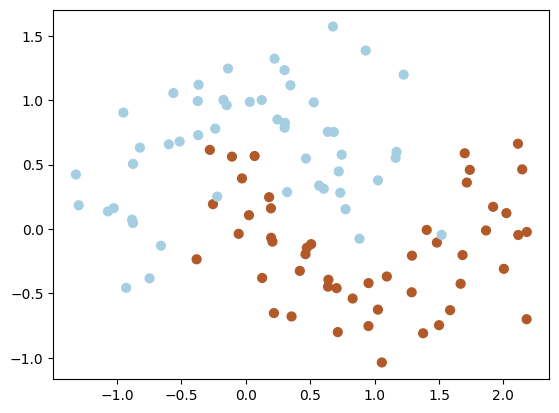

In [36]:
# generate and plot data
X, y = make_moons(noise=0.3, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()

In [37]:
def plot_results(X, y, clf):
  # Visualize data and decision boundary
  cm = plt.cm.RdBu

  # Plot data points
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cm)

  # Plot decision boundary
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Create grid to evaluate the model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T

  # Predict decision function for each grid point
  Z = clf.predict(xy).reshape(XX.shape)

  # Plot predictions and decision boundary
  ax.contourf(XX, YY, Z, cmap=cm, alpha=0.2)
  ax.contour(XX, YY, Z, colors='k', levels=[0.5], alpha=0.5)

  plt.colorbar()
  plt.title("Decision Tree (max_depth=1)")
  plt.show()

  # Print accuracy score
  print("Decision Tree (max_depth=1) accuracy:", clf.score(X, y))


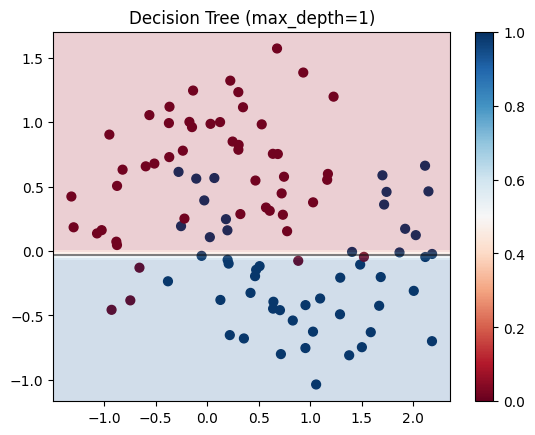

Decision Tree (max_depth=1) accuracy: 0.8


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Fit a simple DecisionTreeClassifier with max_depth=1
clf_simple_tree = DecisionTreeClassifier(max_depth=1)
clf_simple_tree.fit(X, y)
plot_results(X, y, clf_simple_tree)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


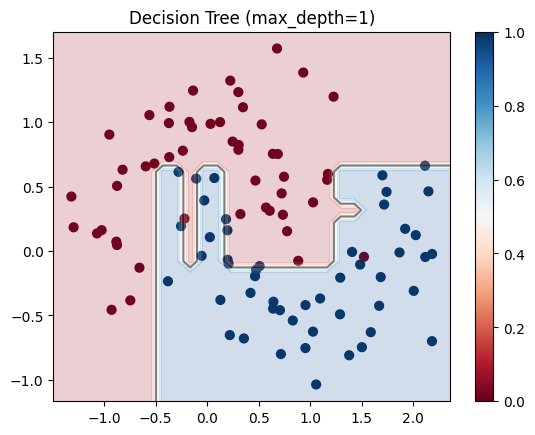

Decision Tree (max_depth=1) accuracy: 1.0


In [39]:
# fit AdaBoost with DecisionStump (1R)
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf.fit(X,y)
plot_results(X, y, clf)

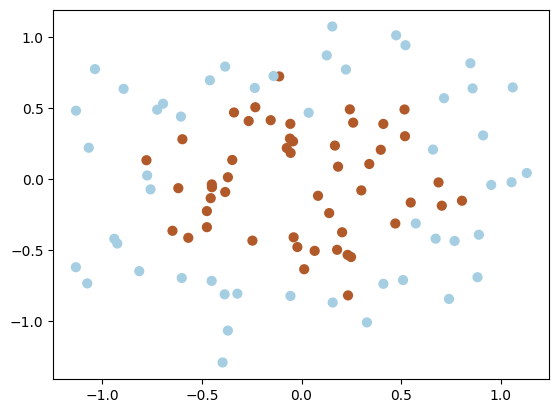

In [40]:
# generate and plot data
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()

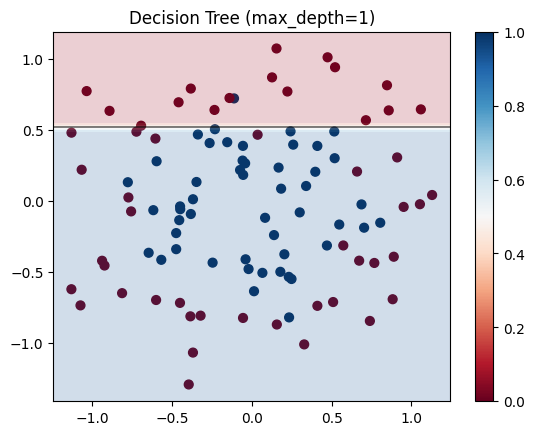

Decision Tree (max_depth=1) accuracy: 0.65


In [41]:
from sklearn.tree import DecisionTreeClassifier

# Fit a simple DecisionTreeClassifier with max_depth=1
clf_simple_tree = DecisionTreeClassifier(max_depth=1)
clf_simple_tree.fit(X, y)
plot_results(X, y, clf_simple_tree)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


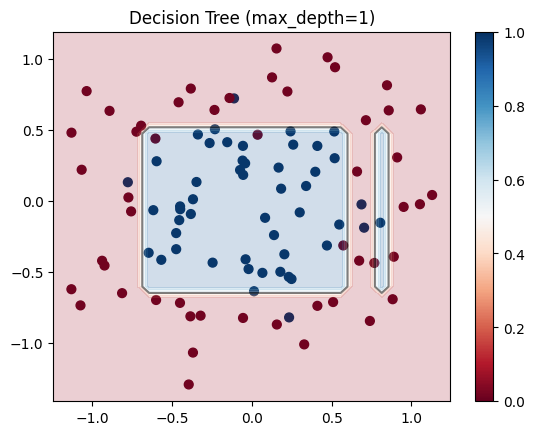

Decision Tree (max_depth=1) accuracy: 1.0


In [42]:
# fit AdaBoost with DecisionStump (1R)
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf.fit(X,y)
plot_results(X, y, clf)